In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('data/최종.csv', encoding = 'euc_kr')
df

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
0,이호동,55071,114543,269222,5412,281,4654,804
1,도두동,65333,141161,441864,9090,991,3257,897
2,봉개동,75072,393438,362387,3873,269,4936,327
3,외도동,75466,994026,944828,11724,1185,21741,514
4,삼양동,78848,638591,1042792,12993,1000,25153,656
5,건입동,113170,1018933,763641,4279,750,9857,370
6,화북동,130560,1346005,1025585,14582,1546,25391,324
7,구좌읍,146522,565136,952715,9161,1738,16283,4
8,한림읍,233952,450801,1377325,12596,2174,25003,53
9,오라동,183289,300518,854466,11943,978,14906,971


In [13]:
df.drop(['자동차등록수', '총인구수'], axis = 1, inplace = True)

In [14]:
df.corr()

,주차수요량,WiFi 접속자수,카드이용자수,사업체수,면수
주차수요량,1.000000,0.715566,0.855503,0.875742,0.457630
WiFi 접속자수,0.715566,1.000000,0.899673,0.893250,0.736787
카드이용자수,0.855503,0.899673,1.000000,0.898986,0.624873
사업체수,0.875742,0.893250,0.898986,1.000000,0.672709
면수,0.457630,0.736787,0.624873,0.672709,1.000000


In [15]:
df.loc[:,['주차수요량', 'WiFi 접속자수']].corr()

,주차수요량,WiFi 접속자수
주차수요량,1.000000,0.715566
WiFi 접속자수,0.715566,1.000000


In [16]:
df.loc[:,['주차수요량', '카드이용자수']].corr()

,주차수요량,카드이용자수
주차수요량,1.000000,0.855503
카드이용자수,0.855503,1.000000


In [18]:
df.loc[:,['주차수요량', '사업체수']].corr()

,주차수요량,사업체수
주차수요량,1.000000,0.875742
사업체수,0.875742,1.000000


In [19]:
df.loc[:,['주차수요량', '면수']].corr()

,주차수요량,면수
주차수요량,1.00000,0.45763
면수,0.45763,1.00000


In [21]:
df.drop(['면수'], axis = 1, inplace = True)
df.head(3)

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,사업체수
0,이호동,55071,114543,269222,281
1,도두동,65333,141161,441864,991
2,봉개동,75072,393438,362387,269


In [22]:
df.corr()

,주차수요량,WiFi 접속자수,카드이용자수,사업체수
주차수요량,1.000000,0.715566,0.855503,0.875742
WiFi 접속자수,0.715566,1.000000,0.899673,0.893250
카드이용자수,0.855503,0.899673,1.000000,0.898986
사업체수,0.875742,0.893250,0.898986,1.000000


In [23]:
from numpy import *
import pandas as np
x = np.array(df["주차수요량"])
x_standard = (x-mean(x, axis = 0))/std(x, axis = 0)
x_standard

<PandasArray>
[  -1.2047561159701465,   -1.1185746836912283,   -1.0367854643417462,
   -1.0334766079474864,   -1.0050741908779774,   -0.7168341676196425,
     -0.57079098818772,   -0.4367403136568203,    0.2975066775871694,
  -0.12796690490618812,  -0.10124411037183635, -0.060521662006948945,
 -0.007361608769222135,   0.17390325522494776,    0.5074678925945009,
    1.0494484922390408,    1.2070978633888998,    1.6491409221915836,
      2.53556171512082]
Length: 19, dtype: float64

In [24]:
print('mean : ', mean(x_standard, axis = 0))
print('std : ', std(x_standard, axis = 0) )

mean :  0.0
std :  1.0


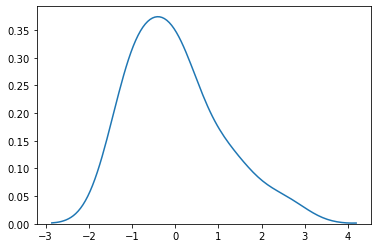

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x_standard, hist=False)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.iloc[:, 1:]
x

,주차수요량,WiFi 접속자수,카드이용자수,사업체수
0,55071,114543,269222,281
1,65333,141161,441864,991
2,75072,393438,362387,269
3,75466,994026,944828,1185
4,78848,638591,1042792,1000
5,113170,1018933,763641,750
6,130560,1346005,1025585,1546
7,146522,565136,952715,1738
8,233952,450801,1377325,2174
9,183289,300518,854466,978


In [27]:
scaler.fit(x)
x_scaled = scalerx_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.20475612, -1.04907818, -1.13546283, -1.16866075],
       [-1.11857468, -1.03074036, -1.01049369, -0.72678526],
       [-1.03678546, -0.8569403 , -1.06802415, -1.17612906],
       [-1.03347661, -0.44317993, -0.64641671, -0.60604746],
       [-1.00507419, -0.68804816, -0.5755042 , -0.72118402],
       [-0.71683417, -0.42602086, -0.77757126, -0.87677398],
       [-0.57079099, -0.20069262, -0.58795971, -0.38137556],
       [-0.43674031, -0.73865318, -0.6407076 , -0.26188247],
       [ 0.29750668, -0.81742147, -0.33334817,  0.00946642],
       [-0.1279669 , -0.92095526, -0.71182641, -0.73487594],
       [-0.10124411, -0.05873677,  0.33589784, -0.06832856],
       [-0.06052166,  0.3487909 , -0.31013026,  0.1476303 ],
       [-0.00736161,  1.36452403,  0.44215585,  0.85712051],
       [ 0.17390326,  0.02763244, -0.17996813, -0.17786389],
       [ 0.50746789,  0.57439953,  1.17950216, -0.1498577 ],
       [ 1.04944849,  2.20239589,  1.97226741,  1.44213876],
       [ 1.20709786,  1.

In [28]:
import pandas as pd
c = pd.DataFrame(x_scaled, columns = x.columns)
c.head()

,주차수요량,WiFi 접속자수,카드이용자수,사업체수
0,-1.204756,-1.049078,-1.135463,-1.168661
1,-1.118575,-1.030740,-1.010494,-0.726785
2,-1.036785,-0.856940,-1.068024,-1.176129
3,-1.033477,-0.443180,-0.646417,-0.606047
4,-1.005074,-0.688048,-0.575504,-0.721184


In [29]:
tot = pd.concat([df['읍면동'], c], axis = 1)
tot.head()

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,사업체수
0,이호동,-1.204756,-1.049078,-1.135463,-1.168661
1,도두동,-1.118575,-1.030740,-1.010494,-0.726785
2,봉개동,-1.036785,-0.856940,-1.068024,-1.176129
3,외도동,-1.033477,-0.443180,-0.646417,-0.606047
4,삼양동,-1.005074,-0.688048,-0.575504,-0.721184
